# Script2 - Transformation & Association metrics

# Librairies 

In [8]:
library(vegan)
library(gplots)
library(gclus)

Loading required package: permute


Attaching package: ‘gplots’


The following object is masked from ‘package:stats’:

    lowess


Loading required package: cluster

Registered S3 method overwritten by 'gclus':
  method         from 
  reorder.hclust vegan



# Loading data

In [10]:
  load("Doubs.RData")  

# Coldiss function

In [16]:
# coldiss()
# Color plots of a dissimilarity matrix, without and with ordering
#
# License: GPL-2
# Author:  Francois Gillet
#          23 August 2012 - rev. 07 June 2016

"coldiss" <- function(D,
                      nc = 4,
                      byrank = TRUE,
                      diag = FALSE) {
  require(gclus)
  
  D <- as.dist(as.matrix(D))
  
  if (max(D) > 1)
    D <- D / max(D)
  
  if (byrank) {
    spe.color <- dmat.color(1 - D, cm.colors(nc))
  }
  else {
    spe.color <- dmat.color(1 - D, byrank = FALSE, cm.colors(nc))
  }
  
  spe.o <- order.single(1 - D)
  speo.color <- spe.color[spe.o, spe.o]
  
  op <- par(mfrow = c(1, 2), pty = "s")
  
  if (diag) {
    plotcolors(
      spe.color,
      rlabels = attributes(D)$Labels,
      main = "Dissimilarity Matrix",
      dlabels = attributes(D)$Labels
    )
    plotcolors(
      speo.color,
      rlabels = attributes(D)$Labels[spe.o],
      main = "Ordered Dissimilarity Matrix",
      dlabels = attributes(D)$Labels[spe.o]
    )
  }
  else {
    plotcolors(spe.color, rlabels = attributes(D)$Labels,
               main = "Dissimilarity Matrix")
    plotcolors(speo.color,
               rlabels = attributes(D)$Labels[spe.o],
               main = "Ordered Dissimilarity Matrix")
  }
  
  par(op)
}

# Usage:
# coldiss(D = dissimilarity.matrix, nc = 4, byrank = TRUE, diag = FALSE)
# If D is not a dissimilarity matrix (max(D) > 1), then D is divided by max(D)
# nc 							number of colours (classes)
# byrank = TRUE		equal-sized classes
# byrank = FALSE	equal-length intervals
# diag = TRUE			print object labels also on the diagonal

# Example:
# coldiss(spe.dj, nc = 9, byrank = FALSE, diag = TRUE)

# Useful functions -> *image.real(), panel.hist(), panel.color()*

In [13]:
# modification of image() to include row and column axis labels
image.real <- function(mat) { 
  mat <- t(mat)[,nrow(mat):1]
  image(mat, axes = FALSE, col = hcl.colors(15, palette="viridis"))
  axis(1, at = seq(0, 1, length = nrow(mat)), labels = rownames(mat), las=2)
  axis(2, at = seq(0, 1, length = ncol(mat)), labels = colnames(mat))
  box() 
}


# Function to display a histogram on the diagonal panels of a pairs plot
panel.hist <- function(x, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(usr[1:2], 0, 1.5) )
  h <- hist(x, plot = FALSE)
  breaks <- h$breaks; nB <- length(breaks)
  y <- h$counts; y <- y / max(y)
  rect(breaks[-nB], 0, breaks[-1], y, col = "cyan", ...)
}

#  Function to display the correlation coefficient in the upper panels of a pairs plot
panel.cor <- function(x, y, digits = 2, prefix = "", cex.cor, ...)
{
  usr <- par("usr"); on.exit(par(usr))
  par(usr = c(0, 1, 0, 1))
  r <- abs(cor(x, y))
  txt <- format(c(r, 0.123456789), digits = digits)[1]
  txt <- paste0(prefix, txt)
  if (missing(cex.cor)) cex.cor <- 0.8 / strwidth(txt)
  text(0.5, 0.5, txt, cex = cex.cor * r)
}


# 0 Simulate Datas -> *rnorm(), runif(), gl(), data.frame()*

<div style="display: flex; align-items: center; gap: 20px;">
  <div style="flex: 1; max-width: 75%;">
    <h2>0.1 Generates <code>n</code> random values from a normal (Gaussian) distribution -> <i>rnorm(n, mean, sd)</i></h2>
    <ul>
      <li><strong>n</strong> → Number of values to generate</li>
      <li><strong>mean</strong> → Mean (center μ ) of the distribution</li>
      <li><strong>sd</strong> → Standard deviation (spread σ) of the distribution</li>
    </ul>
  </div>
  <div style="flex: 1; max-width: 25%;">
    <img src="images/gaussian distribution.png" alt="rnorm function illustration" style="max-width: 100%; height: auto;">
  </div>
</div>

*Source : Normal Distribution Calculator, Inch Calculator, https://www.inchcalculator.com/normal-distribution-calculator/*

In [5]:
# Generate 30 random values from a standard normal distribution (mean = 0, sd = 1)
g1 <- rnorm(30, mean = 0, sd = 1)


g1

mean(g1)
sd(g1)

# Visualize the distribution
#hist(g1, main = "g1 ~ N(0,1)", col = "lightgray", border = "white") <---  ### Uncomment this line to see the histograam ###


[1]  2.43267311 -0.73959702 -0.20352267 -0.12970836  0.78793257  0.86445318
 [7] -0.10180189  0.56174985 -1.07785798 -0.14398972  2.06145736 -0.14823246
[13] -0.22524640 -1.37396968 -0.39358793  2.28965942 -0.20772667 -2.02790761
[19]  0.07585253 -0.62785507  0.39553199  0.22316724 -0.08987049 -0.62312429
[25] -0.02784484 -0.20986399 -3.13558888  0.75510179 -1.82906301 -2.08164040

[1] -0.165014

[1] 1.22438

## 0.2 Generates `n` random values from a uniform distribution -> *runif(n, min, max)*

- **n** → *Number of values to generate*  
- **min** → *Minimum value of the range*  
- **max** → *Maximum value of the range*  


In [35]:
# Generate 30 random values from a uniform distribution between 0 and 5
g2 <- runif(30, min = 0, max = 5)

g2

# Plot a histogram of the generated values
# hist(g2, main = "g2 ~ Uniform(0,5)", col = "lightblue", border = "white") #<---  ### Uncomment this line to see the distribution ###


[1] 3.31247602 4.66233886 0.96637154 2.54937422 2.34714090 3.11500570
 [7] 2.61802257 2.63156155 2.57983317 4.16869544 1.38879058 4.45664058
[13] 0.24645336 1.46524133 3.52992488 1.35914184 4.59124928 3.62597037
[19] 3.38395569 3.99235458 3.11019464 0.84841057 3.23644994 3.09621160
[25] 1.30277172 0.02656019 4.59119125 1.25280697 2.91506593 3.05910432

## 0.3 Creates a factor with repeated levels -> *gl(n, k, length, labels)*

- **n** → *Number of levels (distinct groups)*  
- **k** → *Number of repetitions per level*  
- **length** → *Total number of values (optional)*  
- **labels** → *Names of the levels (e.g., "A", "B")* 

In [7]:
# Generate a factor variable with 3 levels (A, B, C), each repeated 10 times (total length 30)
g3 <- gl(3, 10, labels = c("A", "B", "C"))

# Generate a factor variable with 2 levels (D, E), each repeated 5 times, total length 30
g4 <- gl(2, 5, 30, labels = c("D", "E"))

print(g3)

print(g4)

 [1] A A A A A A A A A A B B B B B B B B B B C C C C C C C C C C
Levels: A B C
 [1] D D D D D E E E E E D D D D D E E E E E D D D D D E E E E E
Levels: D E


## 0.4 Creates a data frame -> *data.frame(...)*

df<-data.frame(colname1 = vector1,
            col2 = vector2,
            .....,
            coln = vectorn
            )
- **...** → *Named vectors or variables to include as columns*  
- **row.names** → *Optional: names for the rows*  



In [8]:
# Create a data frame named dat combining the vectors g1, g2, g3, and g4 as columns
dat <- data.frame(g1, g2, g3, g4)
head(dat)

,g1,g2,g3,g4
,<dbl>,<dbl>,<fct>,<fct>
1,2.4326731,2.7701122,A,D
2,-0.7395970,3.7589791,A,D
3,-0.2035227,2.5907079,A,D
4,-0.1297084,2.9152072,A,D
5,0.7879326,0.1969965,A,D
6,0.8644532,0.4029909,A,E


<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 1</span><br/>
  What  should be the standard deviation of the following line of code ?<br/>
  <pre style="font-size: 20px; margin: 5px 0;"><code>g <- rnorm(30, mean = 15, sd = 100)</code></pre>
    
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    You can check your answer by clicking on the "Answer" below.
  </p>
</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> Standard deviation = 100</code>.
  </div>
</details>


<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 2</span><br/>
  What is the mean and the standard deviation of the following distribution ?<br/>
  
  <!-- Replace code block by image -->
  <div style="text-align: center; margin: 10px 0;">
    <img src="images/uniform distribution.png" alt="Gaussian distribution code" style="max-width: 80%; height: auto;">
  </div>
    
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    You can check your answer by clicking on the "Answer" below.
  </p>
</div>

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>Standard deviation = 5</code>.<br/>
    <code>Mean = 15</code>.
  </div>
</details>


<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 3</span><br/>
  Create a factor vector of length 20 with two levels: <code>"Fish 1"</code> and <code>"Fish 2"</code>.<br/>
  The values should repeat the sequence: <code>4 4 4 4 4</code> for each fish.<br/>
  For example, the vector should look like:<br/>
  <code>"Fish 1" "Fish 1" "Fish 1" "Fish 1" "Fish 1" "Fish 2" "Fish 2" "Fish 2" "Fish 2" "Fish 2" ...</code><br/>
  (total length = 20)
</div>


In [ ]:
# Generate a factor variable with 2 levels (n=),
# each level repeated 4 times consecutively(k=),
# total length of the factor is 20(length=),
# and the levels are labeled as "Fish 1", "Fish 2"
g <- gl(n = ___, k = ___, length = ___, labels = c("____","____"))
g



<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code> g <- gl(<span style="color:blue;">n = 2 </span>, <span style="color:blue;">k=4</span>, <span style="color:blue;">length=20</span>, <span style="color:blue;">labels = c("Fish 1 ","Fish 2")</span> ) </code><br/>
  </div>
</details>


<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">Question 4</span><br/>
  Complete the code below to generate : <br/>
  1) A Gaussian (normal) distribution vector of <strong>length 20</strong> with a <strong>mean of 10</strong> and a <strong>standard deviation of 2</strong>.<br/>
  2) A uniform distribution vector of <strong>length 20</strong> with values <strong>between 10 and 100</strong>.<br/>
  3) A factor vector of <strong>length 20</strong> with <strong>4 levels</strong> labeled <code>&quot;Plant 1&quot;</code>, <code>&quot;Plant 2&quot;</code>, <code>&quot;Plant 3&quot;</code>, and <code>&quot;Plant 4&quot;</code>, each level <strong>repeated 5 times</strong>.<br/>
  4) A Gaussian (normal) distribution vector of <strong>length 20</strong> with a <strong>mean of 1</strong> and a <strong>standard deviation of 0.5</strong>.<br/>
  5) Generate a dataframe using these previous vectors.<br/>
  
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Complete the code to generate these vectors.
  </p>
</div>


In [ ]:
# 1) Generate a Gaussian (normal) distribution vector
# - length: 20
# - mean: 10
# - standard deviation: 2
vec1 <- rnorm(____, mean = ____, sd = ____)

# 2) Generate a uniform distribution vector
# - length: 20
# - values between: 10 and 100
vec2 <- runif(____, min = ____, max = ____)

# 3) Generate a factor vector
# - length: 20
# - levels: "Plant 1", "Plant 2", "Plant 3", "Plant 4"
# - each level repeated: 5 times
vec3 <- gl(____, ____, length = ____, labels = c("Plant 1", "Plant 2", "Plant 3", "Plant 4"))

# 4) Generate another Gaussian (normal) distribution vector
# - length: 20
# - mean: 1
# - standard deviation: 0.5
vec4 <- rnorm(____, mean = ____, sd = ____)


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>vec1 &lt;- rnorm(<span style="color:blue;">20</span>, mean = <span style="color:blue;">10</span>, sd = <span style="color:blue;">2</span>)</code><br/>
  </div>
      <div style="padding: 10px; border:0.1px solid blue; font-size: 20px;">
    <code>vec2 &lt;- runif(<span style="color:blue;">20</span>, min = <span style="color:blue;">10</span>, max = <span style="color:blue;">100</span>)</code><br/>
  </div>
  <div style="padding: 10px; border:0.1px solid blue; font-size: 20px;">
    <code>vec3 &lt;- gl(<span style="color:blue;">4</span>, <span style="color:blue;">5</span>, length = <span style="color:blue;">20</span>, labels = c(<span style="color:blue;">"Plant 1"</span>, <span style="color:blue;">"Plant 2"</span>, <span style="color:blue;">"Plant 3"</span>, <span style="color:blue;">"Plant 4"</span>))</code><br/>
  </div>

  <div style="padding: 10px; border:0.1px solid blue; font-size: 20px;">
    <code>vec4 &lt;- rnorm(<span style="color:blue;">20</span>, mean = <span style="color:blue;">1</span>, sd = <span style="color:blue;">0.5</span>)</code><br/>
  </div>

</details>




In [ ]:
# 5) Combine the vectors into a dataframe
df <- data.frame(Gaussian1 = ___,
                 Uniform = ___,
                 Plant = ___,
                 Gaussian2 = ___)

<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>df &lt;- data.frame(Gaussian1 = <span style="color:blue;">vec1</span>,<br/>
                 Uniform = <span style="color:blue;">vec2</span>,<br/>
                 Plant = <span style="color:blue;">vec3</span>,<br/>
                 Gaussian2 = <span style="color:blue;">vec4</span>)</code><br/>
    <img src="images/df_generated.png" alt="Dataframe generated" style="margin-top: 10px; max-width: 100%; border: 1px solid #ccc;"/>
  </div>
</details>


# 1 Data Transfromations -> *log(), sqrt(df), df^a, decostand(), scale()*

## 1.1  Log-transformation  (right skewed data) -> *log(df),log(df$col)*

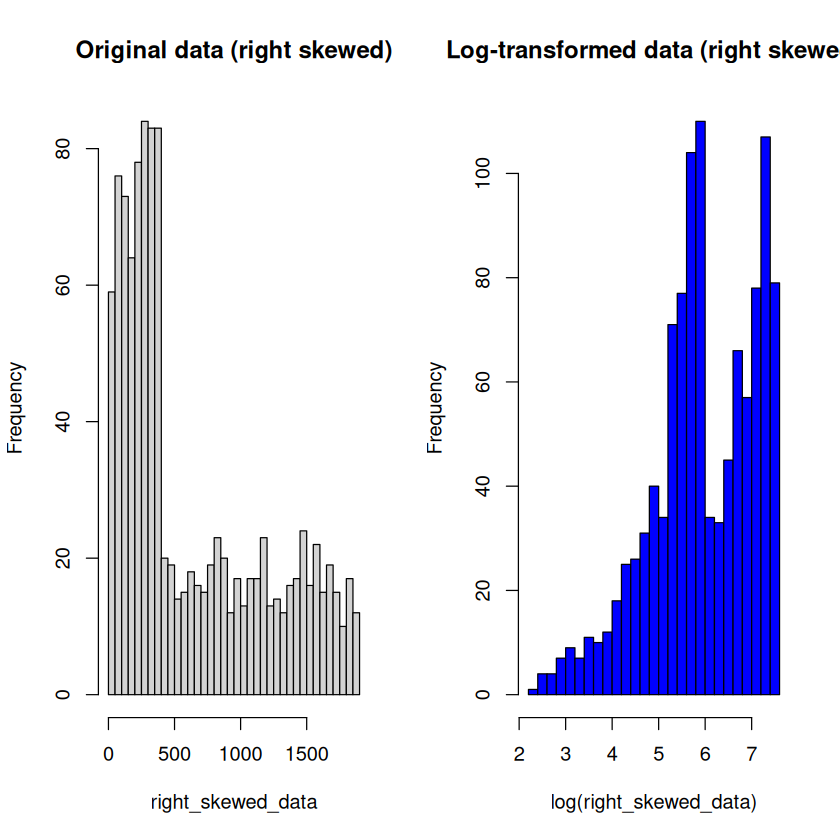

In [6]:
# Create example data frame with right-skewed data
right_skewed_data <- c(runif(600, 10, 400), runif(500, 400, 1900))

par(mfrow = c(1, 2))
# Histogram before transformation 
hist( right_skewed_data, breaks = 30, main = "Original data (right skewed)", col = "lightgray")

# Histogram before transformation 
hist(log(right_skewed_data), breaks = 30, main = "Log-transformed data (right skewed)", col = "blue")

## 1.2  Square-root-transformation (slightly right skewed data) -> *sqrt(df),sqrt(df$col)*

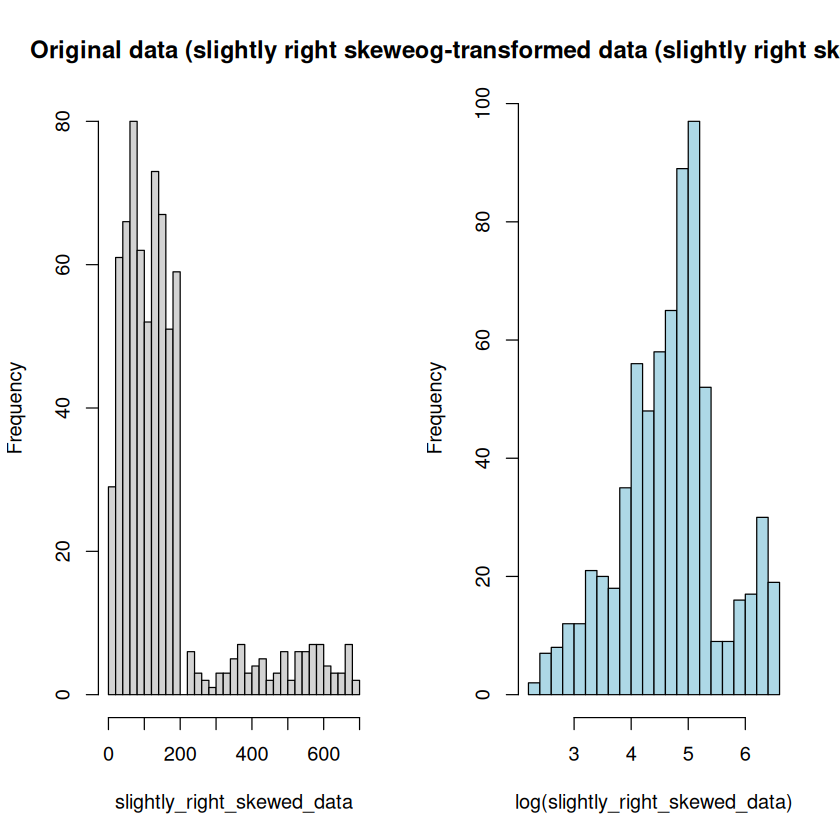

In [10]:
# Create example data frame with slightly right-skewed data
 slightly_right_skewed_data <- c(runif(600, 10, 200), runif(100, 200, 700))

par(mfrow = c(1, 2))
# Histogram before transformation 
hist(slightly_right_skewed_data, breaks = 30, main = "Original data (slightly right skewed)", col = "lightgray")

# Histogram before transformation
hist(log(slightly_right_skewed_data), breaks = 30, main = "Log-transformed data (slightly right skewed)", col = "lightblue")


## 1.3  Power-transformation (left-skewed data) -> *(df)^a,(df$col)^a*

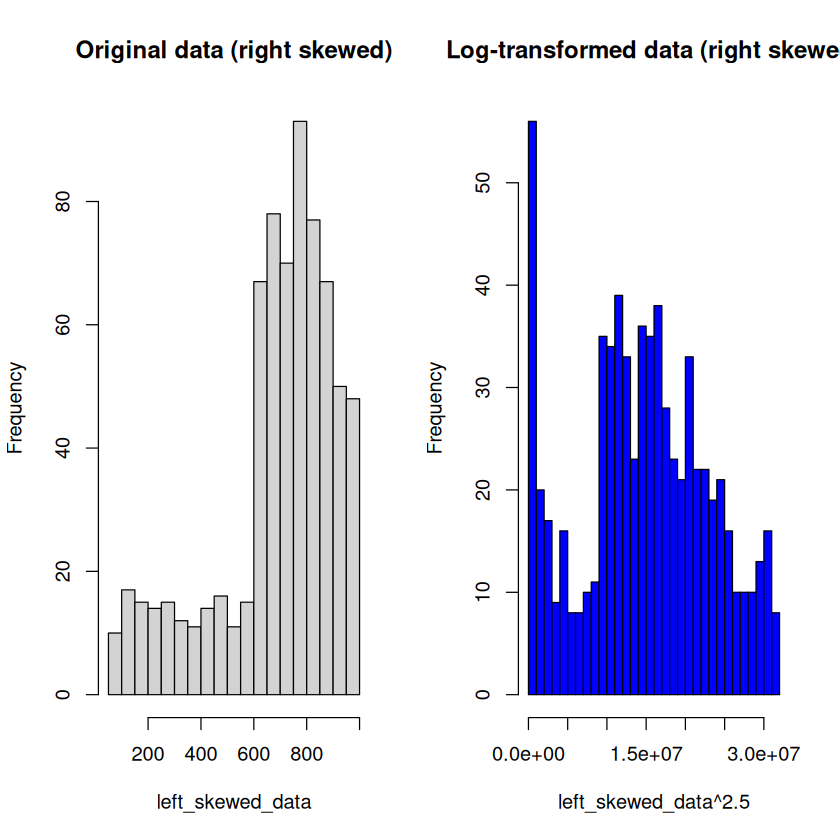

In [11]:
# Create example data frame with left-skewed data
 left_skewed_data <- c(runif(150, 60, 600), runif(550, 600, 1000))

par(mfrow = c(1, 2))
# Histogram before transformation 
hist(left_skewed_data, breaks = 30, main = "Original data (right skewed)", col = "lightgray")

# Histogram before transformation
hist(left_skewed_data^2.5, breaks = 30, main = "Log-transformed data (right skewed)", col = "blue")


## 1.4 Standardization (z-score) -> *decostand(), scale()*

### 1.4.1 Using decostand (standardise every dataframe columns) -> *decostand(df,"standardize")* (**Return a Dataframe**)


In [12]:
# Create a fake dataset with 3 numeric variables
df <- data.frame(
  Temp = c(15, 18, 20, 22, 19),
  pH = c(6.5, 7.0, 6.8, 7.2, 6.9),
  Conductivity = c(120, 150, 160, 180, 140)
)

# Standardize the variables (z-scores: mean = 0, sd = 1)
df_std1 <- decostand(df, method = "standardize")


# Check that the means are ~0 and standard deviations are ~1
apply(df_std1, 2, mean)# check if means = 0
apply(df_std1, 2, sd)# check if sd = 1

Temp            pH  Conductivity 
-2.748154e-16  6.994581e-16  0.000000e+00

Temp           pH Conductivity 
           1            1            1

### 1.4.2 Using scale -> *scale(df)* (**Return a Matrix**)

In [13]:
# Standardize using base R's scale() function
df_std2 <- as.data.frame(scale(df))

# Check that the means are ~0 and standard deviations are ~1
apply(df_std2, 2, mean)# check if means = 0
apply(df_std2, 2, sd)# check if sd = 1


Temp            pH  Conductivity 
-2.748154e-16  6.994581e-16  0.000000e+00

Temp           pH Conductivity 
           1            1            1

<div style="padding: 10px; border:1px solid red; font-size: 18px;">
  <span style="text-decoration:underline; font-weight: bold; font-size: 22px;">HOMEWORK : TASK 1</span><br/>
  Inspect the numerical environmental parameters of the mites dataset (<code>env</code>).<br/>
  <ol>
    <li>Which parameters are numerical?</li>
    <li>Which parameters require transformation to improve normality?</li>
    <li>Which transformation improves normality?</li>
  </ol>
  <p style="text-align: right; margin-bottom: 0px; font-style: italic;">
    Answer these questions based on your analysis.
  </p>
</div>


<div style="padding: 10px; border:1px solid green; font-size: 10px;">
  <span style="font-size: 15px;"> <i>Loading the data from Doubs</i> </span><br/>
</div>


In [17]:
load("Doubs.RData")  

In [ ]:
## Q1 which parameter are numerical? : (hint : sapply(df, class) )
# your code here :

sapply(___,class) # Complete the blank to anylse the env dataset


<details style="font-size: 18px;">
  <summary style="font-size: 20px; font-weight: bold; text-decoration: underline;">1) Answer</summary>
  <div style="padding: 10px; border:1px solid blue; font-size: 20px;">
    <code>sapply(<span style="color:blue;">env</span>,class) </code><br/>
  </div>


<div style="padding: 10px; border:0.05px solid blue; font-size: 18px; margin-top: 5px;">
  <strong>Variable types:</strong><br/>
  dfs : <code>numeric</code><br/>
  ele : <code>integer</code><br/>
  slo : <code>numeric</code><br/>
  dis : <code>numeric</code><br/>
  pH : <code>numeric</code><br/>
  har : <code>integer</code><br/>
  pho : <code>numeric</code><br/>
  nit : <code>numeric</code><br/>
  amm : <code>numeric</code><br/>
  oxy : <code>numeric</code><br/>
  bod : <code>numeric</code><br/>
</div>
</details>




In [15]:
##Q2: which parameter requires transformation to improve normality? (Hint: Use hist())
# your code here :


In [16]:
##Q3: which transformation improves normality? (Hint : use hist(log(df$col)) hist(sqrt(df$col)), hist((df$col)^2)), hist(asin(sqrt(df$col))
# your code here :


# Remmoving empty sites for the rest of the code 

In [11]:
# Remove empty site 8
spe <- spe[-8, ]
env <- env[-8, ]
spa <- spa[-8, ]

# 2 Q-mode Distance Matrices & Dissimilarity Matrices for **(semi-)quantitative data** 
# (Bray-curtis, eucl. distance, chrod distance, hellinger distance)->(*vegdist(),dist()*)

<div style="display: flex; justify-content: space-around;">
    <img src="images/Q_modes.png" width="18%">
    <img src="images/Q_mode_semi.png" width="12%">
</div>

## 2.1 Bray-Curtis dissimilarity matrix -> *vegdist(df)* 

<div style="display: flex; justify-content: space-around;">
    <img src="images/Bray_curtis.png" width="35%">
</div>

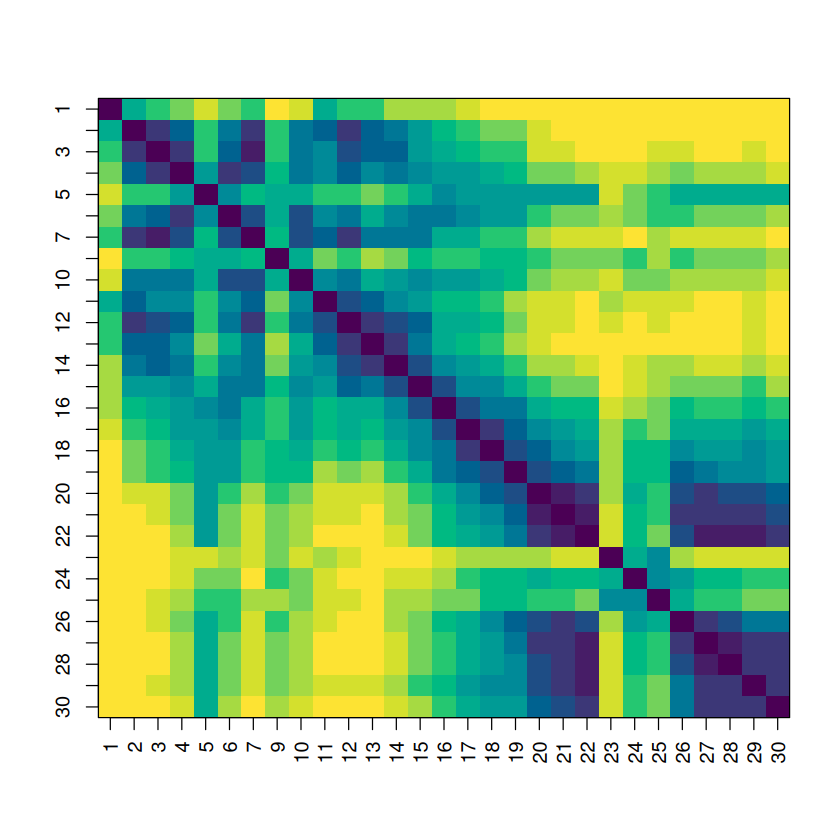

In [14]:
# Percentage difference (aka Bray-Curtis) dissimilarity matrix
# on raw species data. ".db" means "distance Bray".

spe.db <- vegdist(spe)	# method = "bray" (default)
image.real(as.matrix(spe.db))

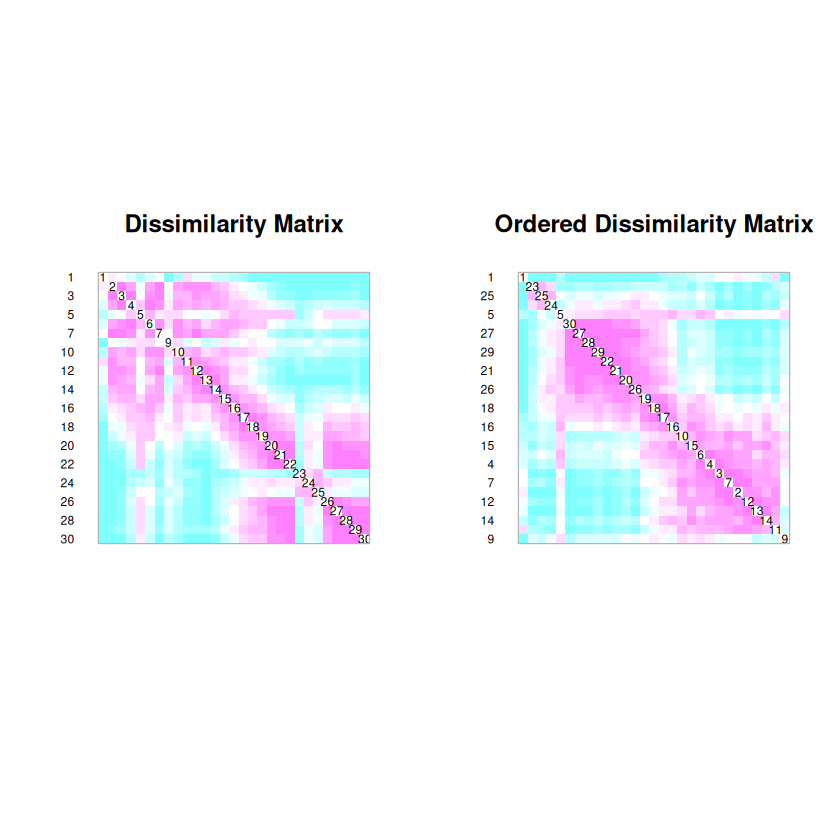

In [17]:
# custom function coldiss (Francois Gillet)
coldiss(spe.db, nc = 15, diag = TRUE)

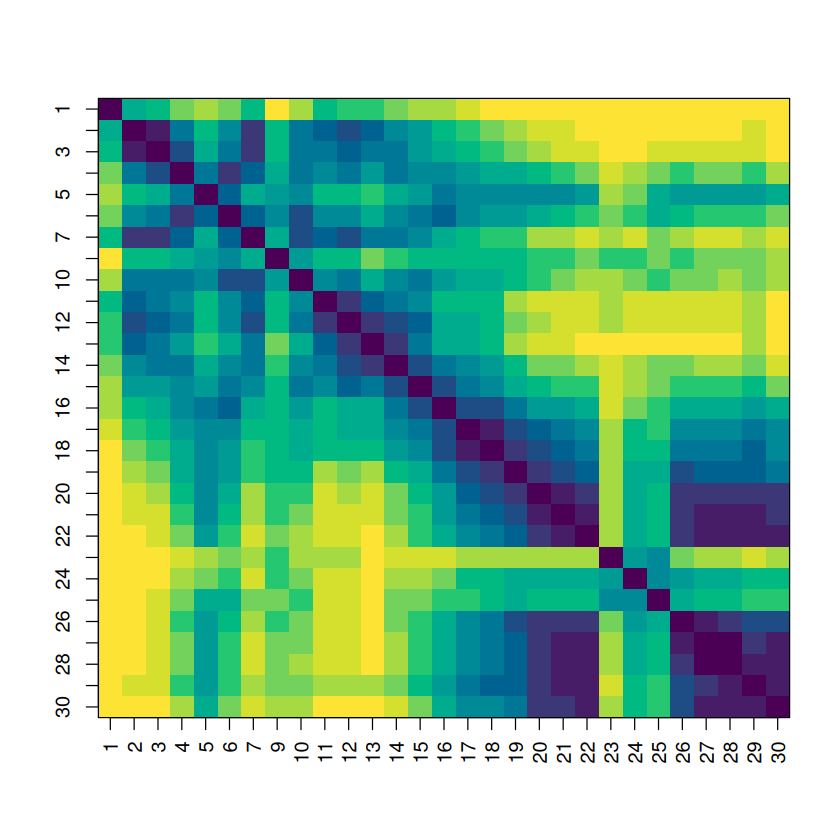

In [18]:
# Percentage difference (aka Bray-Curtis) dissimilarity matrix
# on log-transformed abundances (log(x+1))
spe.dbln <- vegdist(log1p(spe))
image.real(as.matrix(spe.dbln))

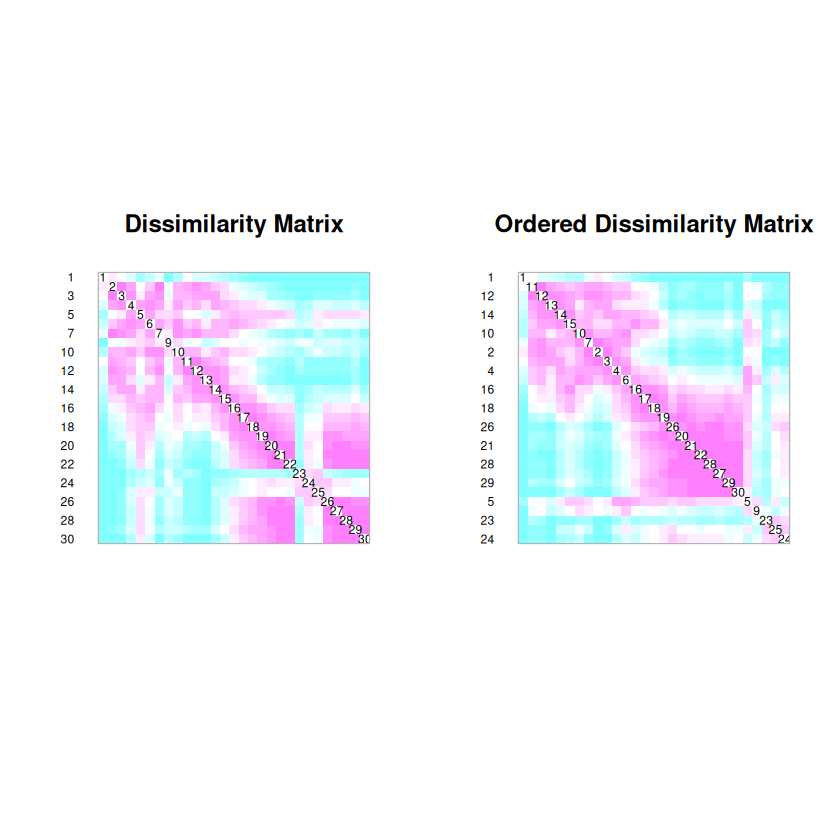

In [19]:
# custom function coldiss (Francois Gillet)
coldiss(spe.dbln, nc = 15, diag = TRUE)

## 2.2 Distance matrices -> *dist()*

### 2.2.1 Euclidian distance matrix -> *dist(df)*

<div style="display: flex; justify-content: space-around;">
    <img src="images/euclidian distance.png" width="15%">
</div>

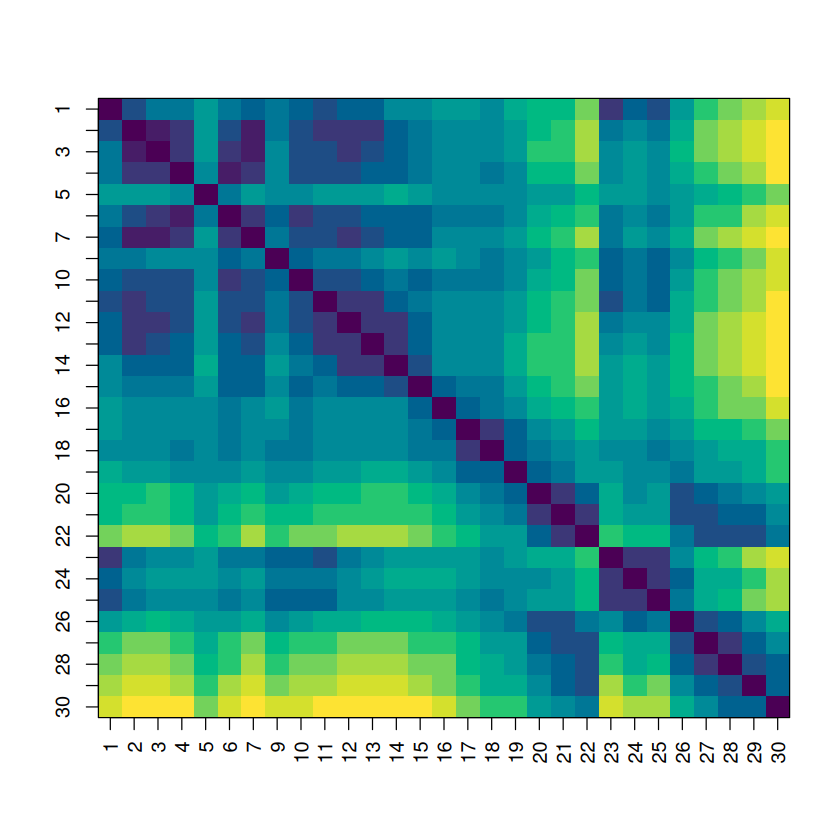

In [21]:
# Compute Euclidean distance matrix
spe.eucl <- dist(spe)
# Visualize the matrix
image.real(as.matrix(spe.eucl))

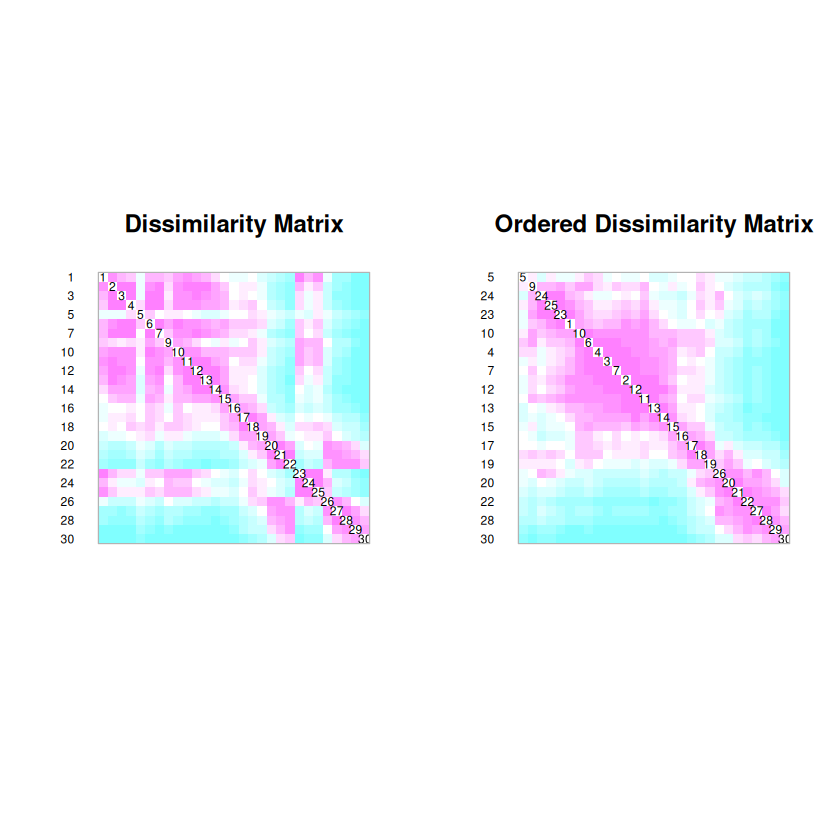

In [22]:
# custom function coldiss (Francois Gillet)
coldiss(spe.eucl, nc = 15, diag = TRUE)

### 2.2.2 Chord distance matrix -> *dist(df_norm)*

<div style="display: flex; justify-content: space-around;">
    <img src="images/chord distance.png" width="25%">
</div>

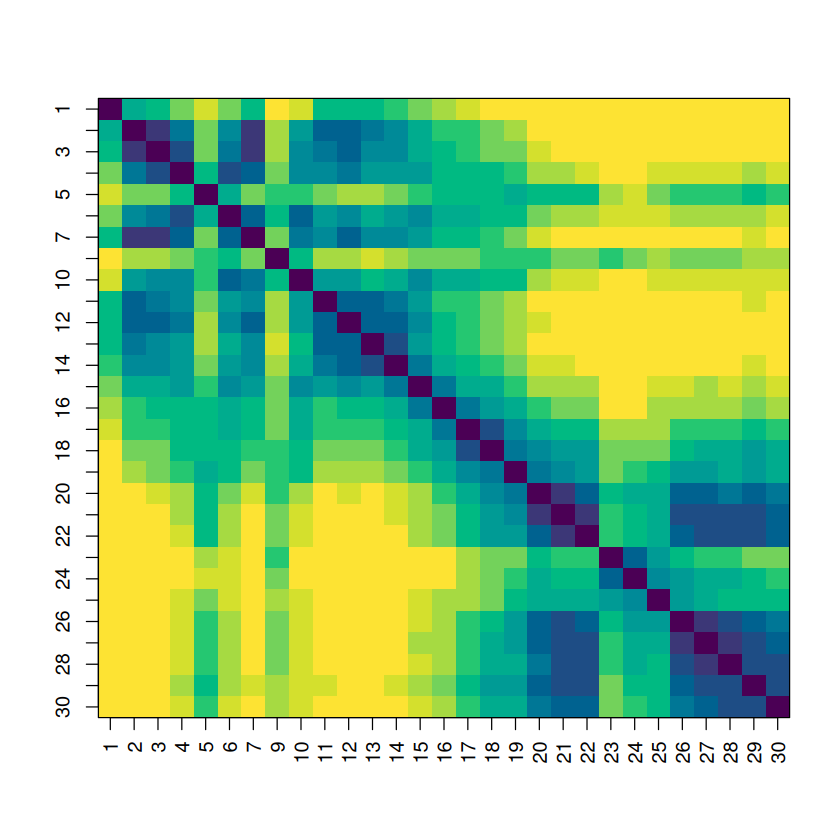

In [23]:
# Chord distance matrix
spe.norm <- decostand(spe, "nor")
spe.dc <- dist(spe.norm)
image.real(as.matrix(spe.dc))

### 2.2.3 Hellinger distance matrix -> dist(df_hel)

<div style="display: flex; justify-content: space-around;">
    <img src="images/Hellinger Distance.png" width="25%">
</div>

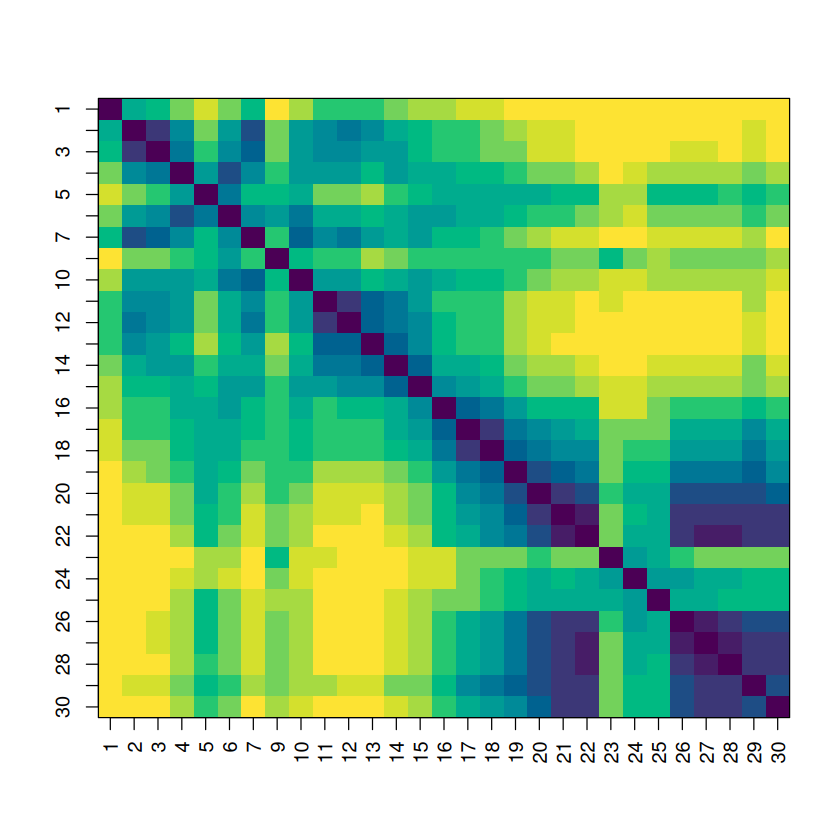

In [24]:
# Hellinger distance matrix
spe.hel <- decostand(spe, "hel")
spe.dh <- dist(spe.hel)
image.real(as.matrix(spe.dh))

# 3  Q-mode dissimilarity measures for **binary data** (Jaccard, Sorensen )->(*vegdist(),dist()*)

<div style="display: flex; justify-content: space-around;">
    <img src="images/Q_modes.png" width="18%">
    <img src="images/Q_mode_semi.png" width="12%">
</div>

## 3.1 Jaccard Dissimilarity matrix -> *vergist() & dist()*

### 3.1.1 Using vergdist() -> *vegdist(df, "jac", binary = TRUE)*

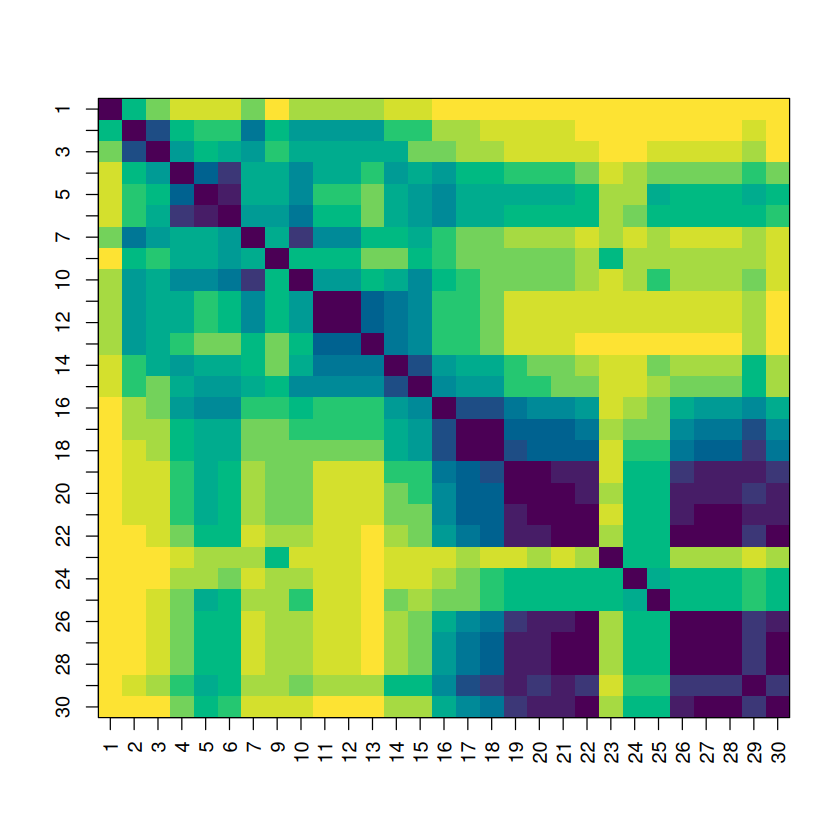

In [23]:
# Jaccard dissimilarity matrix using function vegdist()
spe.dj <- vegdist(spe, "jac", binary = TRUE)
image.real(as.matrix(spe.dj))

### 3.1.2 Using dist() -> *dist(df, "binary")*

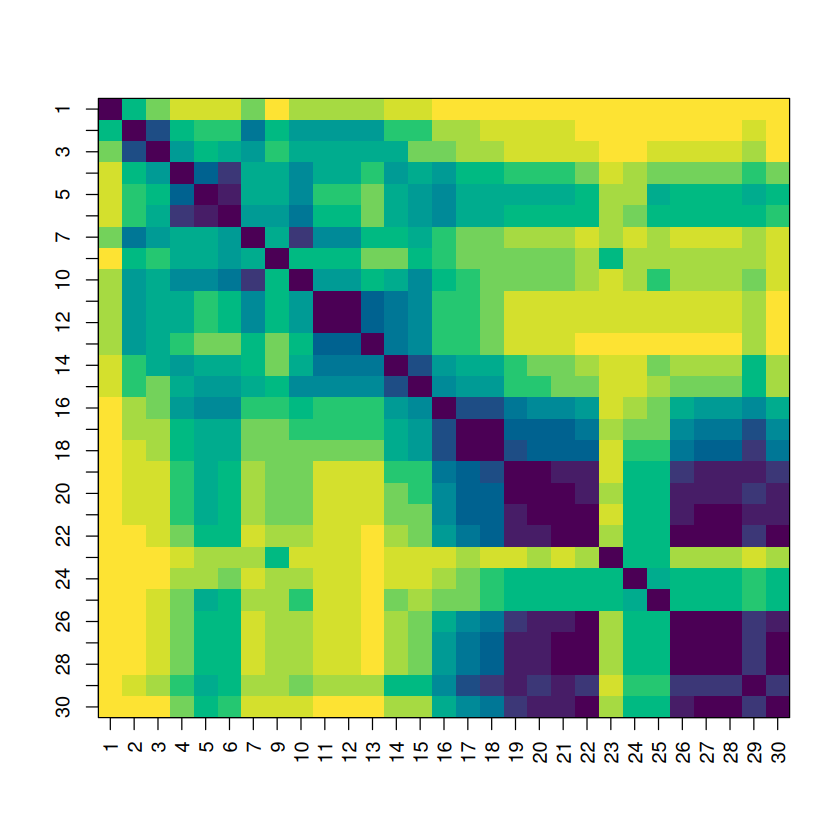

In [24]:
# Jaccard dissimilarity matrix using function dist()
spe.dj2 <- dist(spe, "binary")
image.real(as.matrix(spe.dj2))

## 3.2 Sorensen dissimilarity matrix -> *vegdist(df, method = "bray", binary = TRUE)*

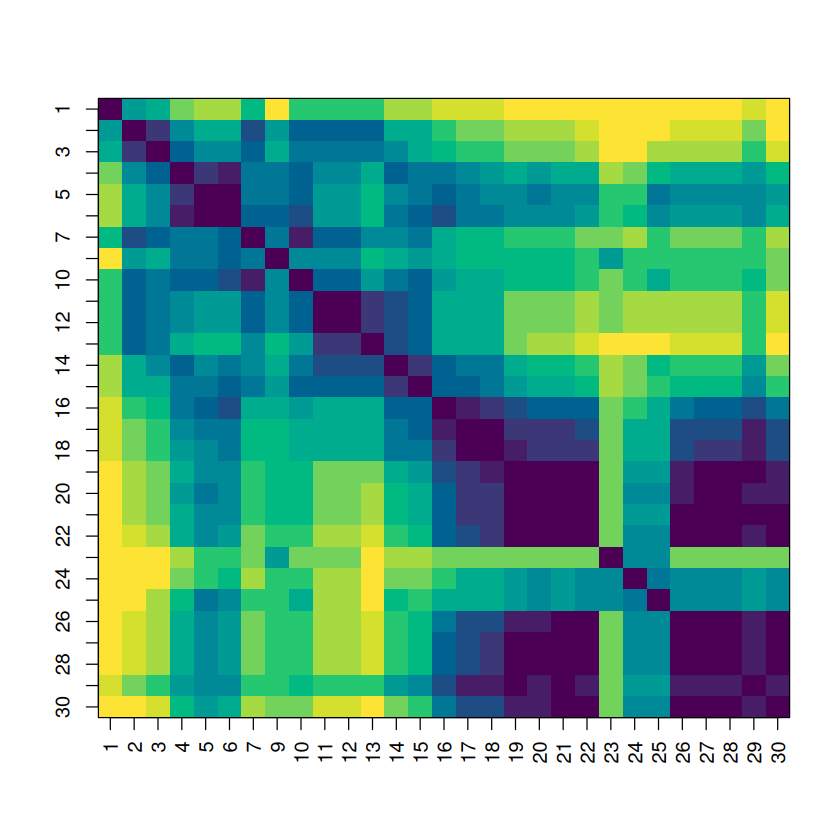

In [25]:
# Sorensen dissimilarity matrix
spe.ds <- vegdist(spe, method = "bray", binary = TRUE)
image.real(as.matrix(spe.ds))

# Compare distance matrices from environmental, species and spatial data

## Remove the 'dfs' variable from the env dataset

In [26]:
# Remove the 'dfs' variable from the env dataset
env2 <- env[, -1]

## Euclidean distance matrix of the standardized env2 data frame

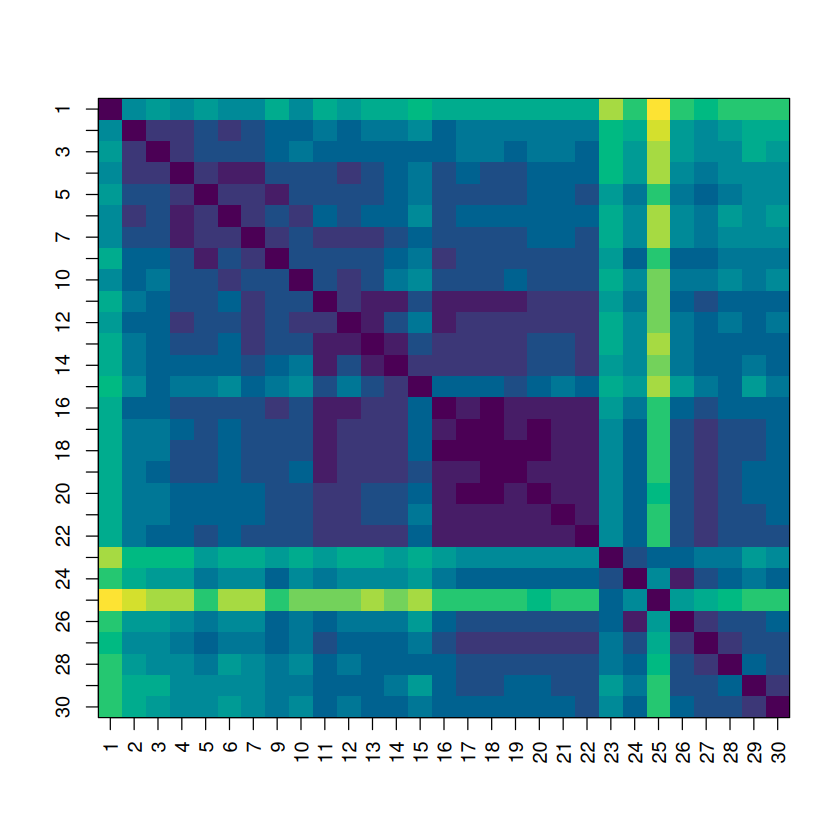

In [27]:
# Euclidean distance matrix of the standardized env2 data frame
env.de <- dist(scale(env2))
image.real(as.matrix(env.de))

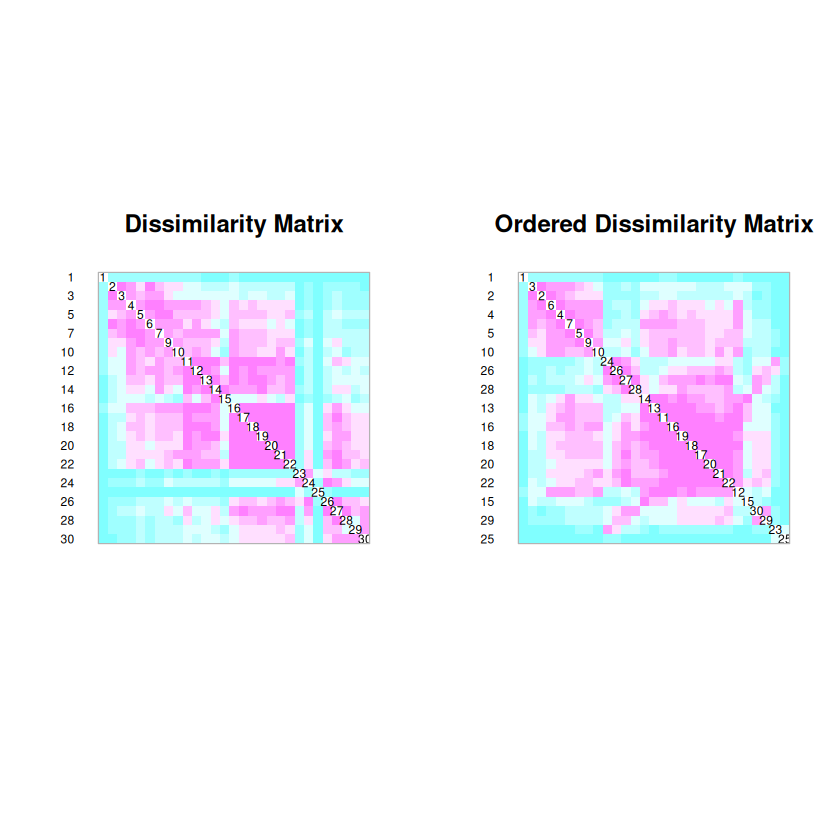

In [28]:
coldiss(env.de, nc=8, diag=TRUE)

## Euclidean distance matrix on spatial coordinates (2D)

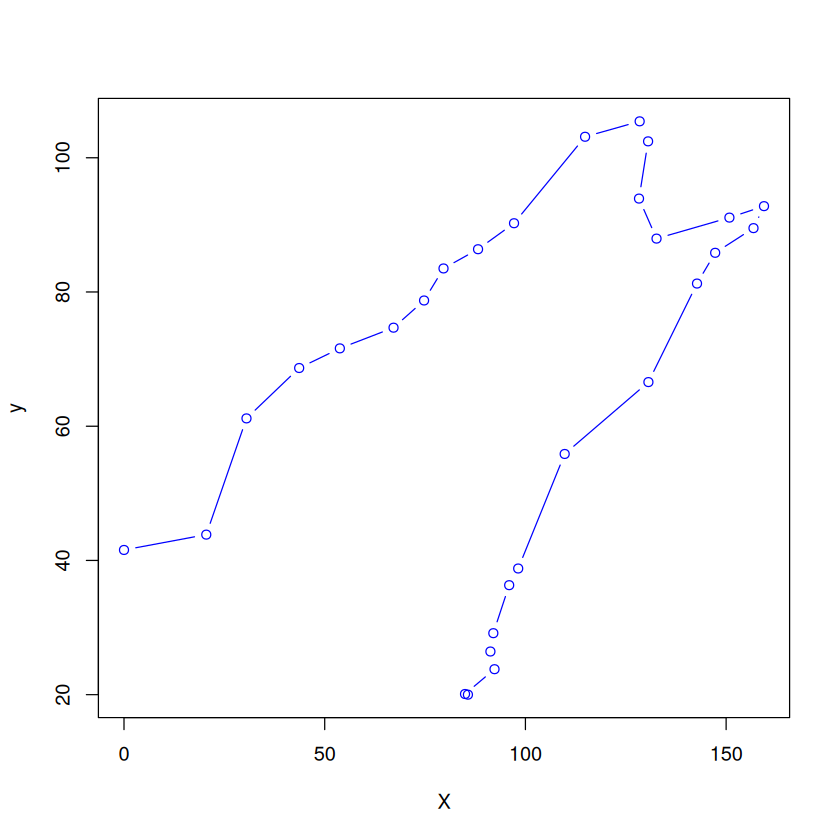

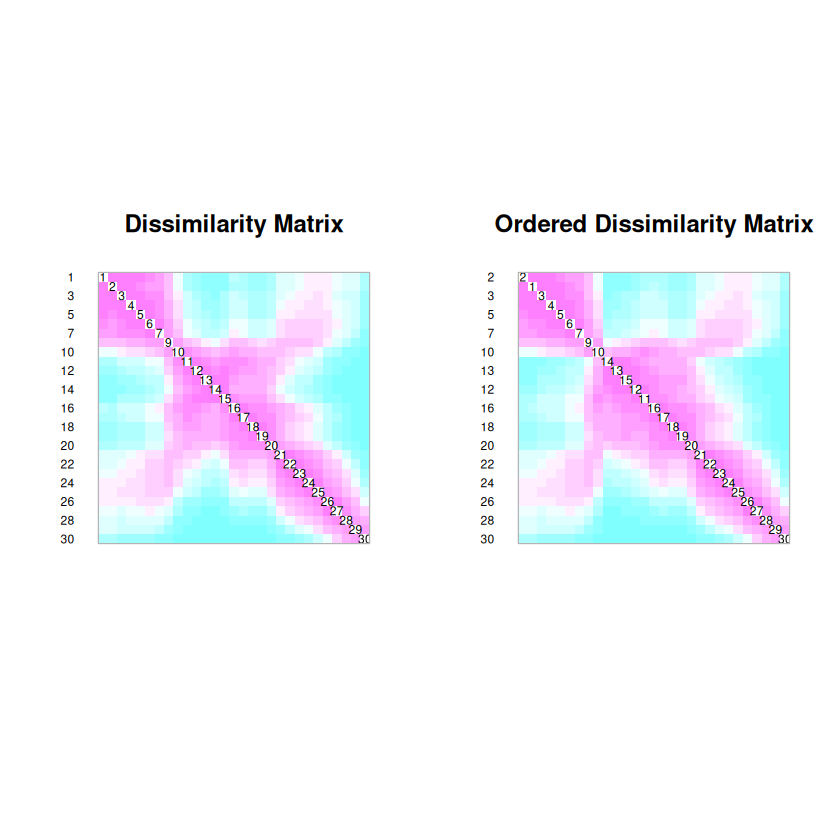

In [28]:
# Euclidean distance matrix on spatial coordinates (2D)
plot(spa$X, spa$Y, type="b", col="blue", xlab="X", ylab="y")
spa.de <- dist(spa)
coldiss(spa.de, nc = 16, diag = TRUE)

## Euclidean distance matrix on distance from the source (1D)

,env$dfs
,<dbl>
1,0.3
2,2.2
3,10.2
4,18.5
5,21.5
6,32.4


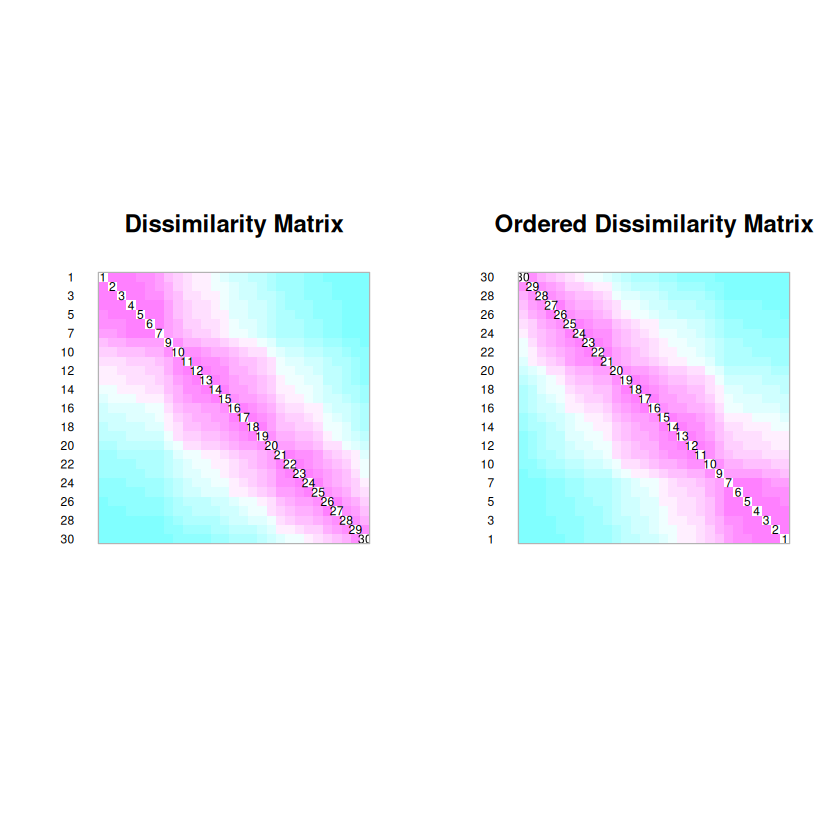

In [29]:
# Euclidean distance matrix on distance from the source (1D)

dfs.df <- as.data.frame(env$dfs, row.names = rownames(env))
head(dfs.df)
riv.de <- dist(dfs.df)
coldiss(riv.de, nc = 16, diag = TRUE)

# 4 Q-mode Gower Dissimilarity Matrix for **Mixed-Type Data** → *daisy()*

## Using daisy() -> *daisy(df,"gower")*

In [138]:
# Fictitious data for Gower index

# Generate 30 random values from a standard normal distribution (mean = 0, sd = 1)
g1 <- rnorm(30, mean = 0, sd = 1)

# Generate 30 random values from a uniform distribution between 0 and 5
g2 <- runif(30, min = 0, max = 5)

# Generate a factor variable with 3 levels (A, B, C), each repeated 10 times (total length 30)
g3 <- gl(3, 10, labels = c("A", "B", "C"))

# Generate a factor variable with 2 levels (D, E), each repeated 5 times, total length 30
g4 <- gl(2, 5, 30, labels = c("D", "E"))


# Create a data frame named dat combining the vectors g1, g2, g3, and g4 as columns
dat <- data.frame(g1, g2, g3, g4)
head(dat)

,g1,g2,g3,g4
,<dbl>,<dbl>,<fct>,<fct>
1,-1.676498803,0.6840342,A,D
2,-1.109260962,0.2399555,A,D
3,0.298399741,1.3849112,A,D
4,-0.913287524,2.4169574,A,D
5,0.003584912,0.4519673,A,D
6,-0.186782103,2.2312696,A,E


[1] 0.0273136 0.8631347

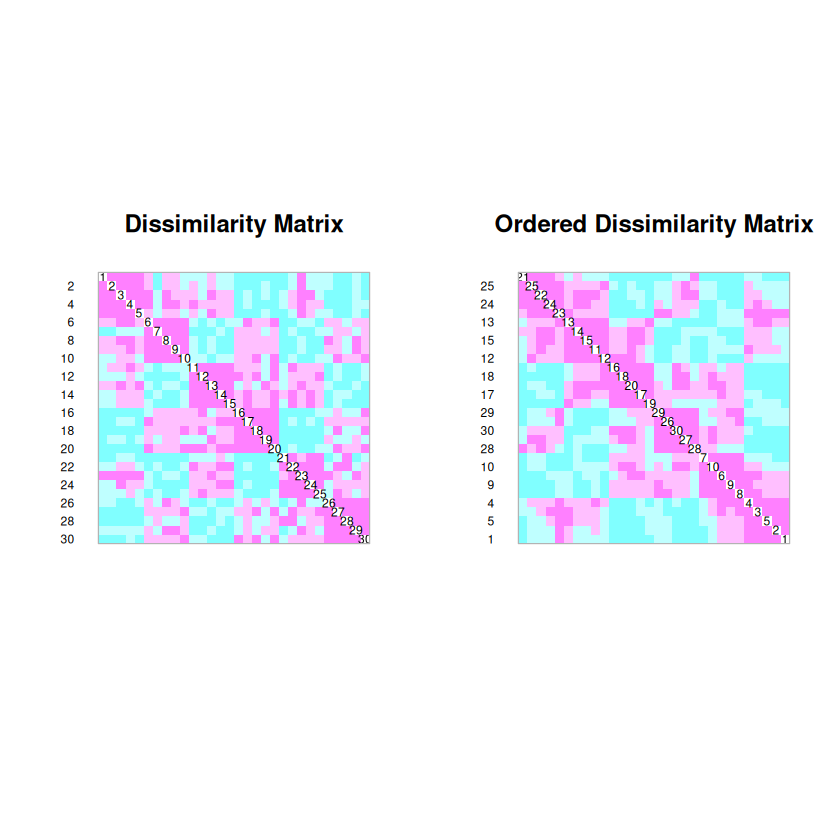

In [139]:
# Complete data matrix (4 variables)
dat_gower <- daisy(dat, "gower")
range(dat_gower)
coldiss(dat_gower, diag = TRUE)

# HOMEWORK : TASK 2: use the mite.spe and plot the Bray-Curtis dissimilarity and Jaccard dissimilariy matrices

- #Q1: visually estimate how many (large) clusters of samples are there based on Bray-Curtis dissimilarity?
- #Q2: is there a difference between number of clusters of samples based on Bray-Curtis and Jaccard dissimilarities?
- #Q3: Based on the results to the question above - what can we learn about the distribution of species and their abundance in the mite dataset?

In [142]:
#Q1: visually estimate how many (large) clusters of samples are there based on Bray-Curtis dissimilarity? (hint : use vegdist(), coldiss())
# your code here :

In [140]:
#Q2: is there a difference between number of clusters of samples based on Bray-Curtis and Jaccard dissimilarities? (hint : use vegdist(),vegdist(df, "jac", binary = TRUE),coldiss() )
# your code here :

In [141]:
#Q3: Based on the results to the question above - what can we learn about the distribution of species and their abundance in the mite dataset?
# your code here :

# 5 R-mode Correlations Matrices -> (*pairs(),cor(df),cor(df,method=),order.single()*)

<div style="display: flex; justify-content: space-around;">
    <img src="images/R mode.png" width="25%">
</div>

## 5.1 Pearson r linear correlation -> *cor(df)*, *pairs()*

## 5.1.1 Pearson r linear correlation -> *pairs(df)*

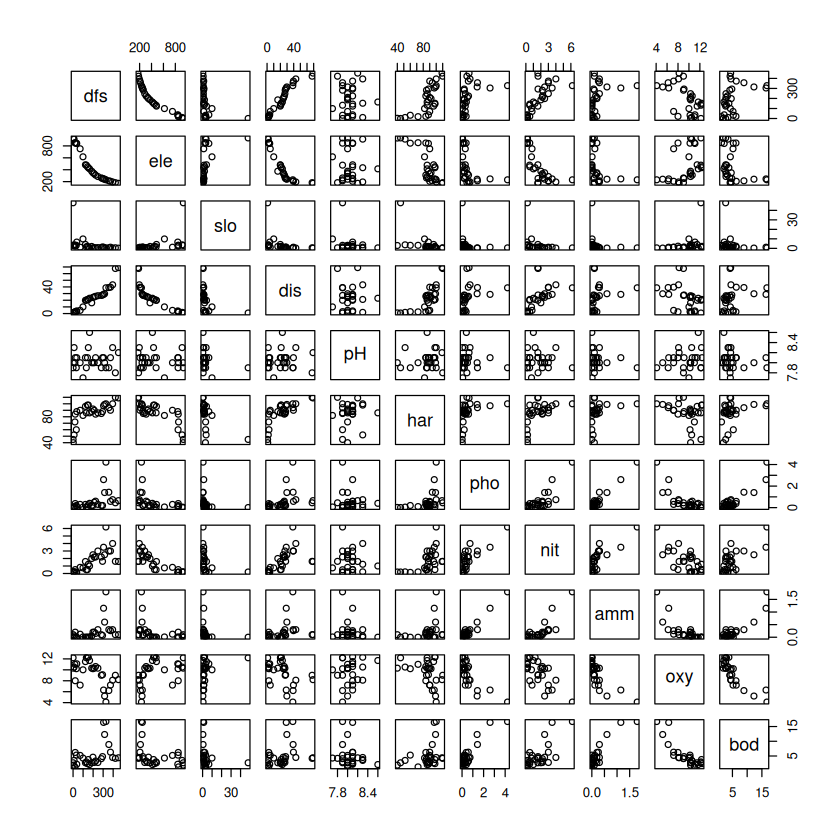

In [144]:
# Creates a scatterplot matrix of all pairwise variable combinations in the 'env' data frame
# Each panel shows a scatterplot of one variable against another
pairs(env) 

## 5.1.2 Pearson r linear correlation -> *cor(df)*

,dfs,ele,slo,dis,pH,har,pho,nit,amm,oxy,bod
dfs,1.00,-0.94,-0.39,0.95,0.02,0.73,0.47,0.74,0.41,-0.57,0.43
ele,-0.94,1.00,0.46,-0.86,-0.05,-0.79,-0.44,-0.75,-0.38,0.42,-0.38
slo,-0.39,0.46,1.00,-0.36,-0.22,-0.53,-0.20,-0.31,-0.17,0.31,-0.17
dis,0.95,-0.86,-0.36,1.00,0.03,0.74,0.38,0.59,0.29,-0.42,0.30
pH,0.02,-0.05,-0.22,0.03,1.00,0.08,-0.08,-0.04,-0.12,0.19,-0.16
har,0.73,-0.79,-0.53,0.74,0.08,1.00,0.37,0.53,0.30,-0.37,0.34
pho,0.47,-0.44,-0.20,0.38,-0.08,0.37,1.00,0.80,0.97,-0.76,0.91
nit,0.74,-0.75,-0.31,0.59,-0.04,0.53,0.80,1.00,0.80,-0.69,0.68
amm,0.41,-0.38,-0.17,0.29,-0.12,0.30,0.97,0.80,1.00,-0.75,0.90
oxy,-0.57,0.42,0.31,-0.42,0.19,-0.37,-0.76,-0.69,-0.75,1.00,-0.84


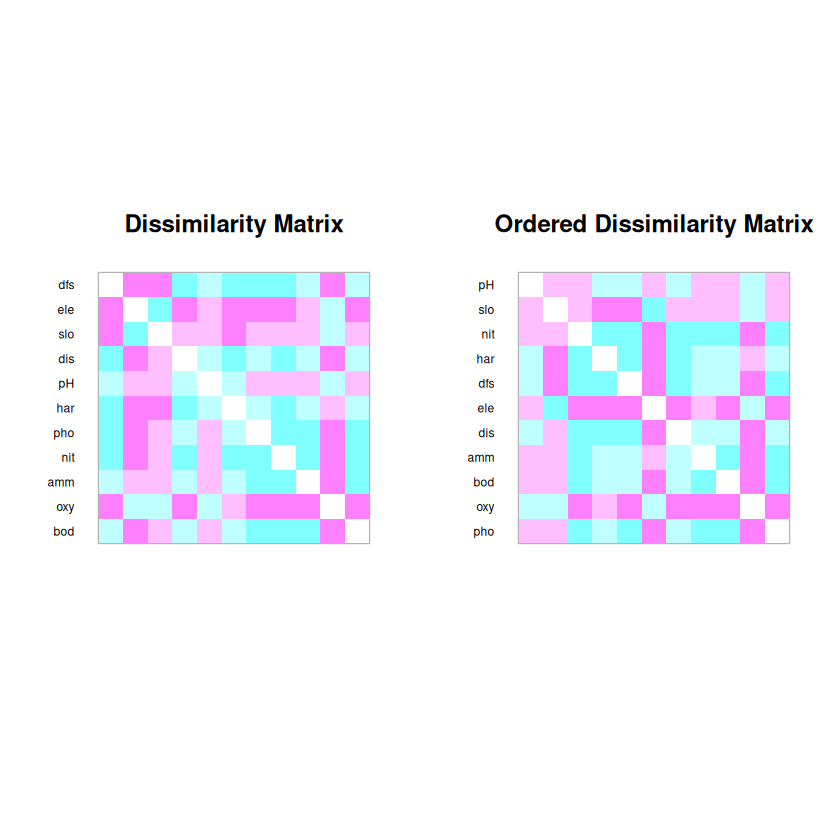

In [145]:
# Pearson r linear correlation among environmental variables
env.pearson <- cor(env)	# default method = "pearson"
round(env.pearson, 2)
coldiss(env.pearson)

## 5.2  Kendall tau rank correlation -> cor(df, method = "kendall")

In [146]:
# Kendall tau rank correlation among environmental variables
env.ken <- cor(env, method = "kendall")
env.ken

,dfs,ele,slo,dis,pH,har,pho,nit,amm,oxy,bod
dfs,1.00000000,-1.00000000,-0.61808412,0.97536946,0.03268505,0.6000675,0.5665032,0.66007426,0.43865122,-0.3940456,0.3514895
ele,-1.00000000,1.00000000,0.61808412,-0.97536946,-0.03268505,-0.6000675,-0.5665032,-0.66007426,-0.43865122,0.3940456,-0.3514895
slo,-0.61808412,0.61808412,1.00000000,-0.62312970,-0.09485373,-0.4814534,-0.5879454,-0.55572015,-0.49771661,0.3499593,-0.3042375
dis,0.97536946,-0.97536946,-0.62312970,1.00000000,0.04902758,0.6050681,0.5715165,0.63507145,0.41238468,-0.3691060,0.3514895
pH,0.03268505,-0.03268505,-0.09485373,0.04902758,1.00000000,0.1410110,0.1413703,0.01105969,-0.05228407,0.1792655,-0.1177027
har,0.60006751,-0.60006751,-0.48145340,0.60506807,0.14101101,1.0000000,0.4860067,0.46192893,0.30129798,-0.2607603,0.2763959
pho,0.56650323,-0.56650323,-0.58794536,0.57151653,0.14137027,0.4860067,1.0000000,0.61068900,0.58541922,-0.5152351,0.4786274
nit,0.66007426,-0.66007426,-0.55572015,0.63507145,0.01105969,0.4619289,0.6106890,1.00000000,0.67458752,-0.4202545,0.4070557
amm,0.43865122,-0.43865122,-0.49771661,0.41238468,-0.05228407,0.3012980,0.5854192,0.67458752,1.00000000,-0.6835203,0.5490554
oxy,-0.39404560,0.39404560,0.34995926,-0.36910600,0.17926550,-0.2607603,-0.5152351,-0.42025451,-0.68352031,1.0000000,-0.6641792


## 5.3 Order single -> order.single(cor_df) 

In [152]:
# performs a hierarchical clustering 
# returns an object representing the clustering order of samples based on their similarity/distance.
env.o <- order.single(env.ken)
env.o

[1] 11  7  9  8  1  4  6  5 10  2  3